In [1]:
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from utils import CountVectorizer, TfidfVectorizer, Ngram

In [2]:
obj_tbl = pd.read_csv("../../data/tables/Objects.csv.gz")
str_cols = "Title", "Description"

all_txts = [s for col in str_cols for s in obj_tbl[col].dropna()]

txts = all_txts

In [3]:
tokens = [w for txt in all_txts for w in txt.split()]

print("number of tokens: ", len(tokens))
print("number of types: ", len(set(tokens)))
print("TTR: ", len(set(tokens))/len(tokens))

number of tokens:  274580
number of types:  43518
TTR:  0.15848932915725836


In [4]:
# sns.histplot([len(t.split()) for t in txts])
# plt.yscale("log")
# plt.xscale("log")

## N-grams

In [5]:
NG = Ngram((1,2), txts, precompute_freqs=True)

(1, 2)-grams: Term Document Matrix constructed...
(1, 2)-grams: Term frequencies precomputed...
(1, 2)-grams: Init done


In [6]:
{w: NG.cond_prob(*w.split()) for w in NG.vocab(2)}

{'also no': 0.021739130434782608,
 'rempli de': 1.0,
 'missionaris in': 0.5,
 'sluiten van': 0.6,
 'vaak ook': 0.011560693641618497,
 'boarding schools': 1.0,
 'umazura familie': 1.0,
 'bloemtakken lotusplanten': 1.0,
 'gouddraad er': 0.06666666666666667,
 'de generaal': 6.0201071579074104e-05,
 'zoals parelmoerschelpen': 0.00904977375565611,
 'en stelde': 0.00014320492624946297,
 'hoepel zijn': 0.2,
 'de zuidelijke': 0.0011438203600024081,
 'ritmes van': 0.8,
 'ir spaan': 0.2727272727272727,
 'prinselijke hoogheid': 0.3333333333333333,
 'hebben mannen': 0.0036101083032490976,
 'muren van': 0.25,
 'een javaan': 0.00021829294913774285,
 'meer velenen': 0.004608294930875576,
 'vaker voor': 0.3333333333333333,
 'streken met': 0.1,
 'er grote': 0.001607717041800643,
 'het bijzijn': 0.00029433406916850625,
 'rijksmuseum voor': 0.8,
 'vo bekkenvormig': 0.004830917874396135,
 'grand gong': 0.5,
 'mee naast': 0.014705882352941176,
 'koloniale politie': 0.022222222222222223,
 'mixteekse taalfam

In [7]:
# write out vocab
NG.save("counts")

## PMI

In [14]:
pmis = {w: NG.pmi(*w.split()) for w in NG.vocab(2)}

In [16]:
for w, val in sorted(pmis.items(), key=lambda tup: tup[1], reverse=True):
    if 9.5 < val < 11:
        print(w, val)

ijzeren beslag 10.99904788401356
ijzeren drevel 10.99904788401356
ijzeren stift 10.99904788401356
ijzeren mokko 10.99904788401356
ijzeren spijltjes 10.99904788401356
ijzeren lancetvormige 10.99904788401356
hals split 10.996297272997527
verzameling etiketten 10.996297272997527
zijden hoes 10.996297272997523
zuid amerikaanse 10.994818344071613
pa badan 10.990811733913796
film el 10.990811733913796
stand after 10.990811733913796
more women 10.988076766192558
niessen 1988 10.988076766192558
kranten vermoedelijk 10.988076766192558
hindoe godheid 10.988076766192558
groote gouden 10.988076766192558
mal gebroken 10.988076766192558
hoorn ivoor 10.988076766192558
koperen cent 10.988076766192558
heer jongmans 10.988076766192558
1925 map 10.988076766192558
name ontwikkeld 10.988076766192558
3a doos 10.988076766192558
vodun godheid 10.988076766192558
biedt ruimte 10.988076766192558
km per 10.988076766192558
appel doos 10.988076766192558
rijkelijk gedecoreerd 10.988076766192558
spirituele traditie 1

soort heraldische 10.728690137373906
teksten links 10.728690137373906
ugali soort 10.728690137373906
soort duwkar 10.728690137373906
ceremoniele zwaarden 10.728690137373906
al rijdend 10.728690137373906
sommige boeren 10.728690137373906
soort oorpluggen 10.728690137373906
al leverbaar 10.728690137373906
links bovenin 10.728690137373906
paar oorhangers 10.728690137373906
schepper paar 10.728690137373906
ceremoniele plechtigheden 10.728690137373906
ceremoniele balum 10.728690137373906
overeenkomsten tussen 10.728119563887772
individuele stijl 10.725042360358762
doordat indianen 10.722615622964224
vier aangesneden 10.721858103891483
medaillefonds jaar 10.719587930266655
ondergeschikte rol 10.719587930266655
dertien jaar 10.719587930266655
bedekte delen 10.719587930266655
gebonden kokers 10.719587930266654
jonge gezinnen 10.719587930266654
voorouders wiens 10.719587930266654
jonge dienster 10.719587930266654
jaar verbannen 10.719587930266654
halve coix 10.717321323294708
oorspronkelijk ech

spanrepen kunnen 10.532624998467805
gevechtsdoeleinden kunnen 10.532624998467805
knie kunnen 10.532624998467805
islamitische heilige 10.530633700648714
kabelbaan sumatra 10.52864514755526
bekende ikat 10.52864514755526
not stop 10.52864514755526
karbouwengat sumatra 10.52864514755526
ander scherp 10.52864514755526
1959 12 10.52864514755526
probably not 10.52864514755526
poppen opgesteld 10.52864514755526
typische tami 10.52864514755526
12 cent 10.52864514755526
koninklijke kenmerken 10.524676245352316
peoples their 10.524676245352316
hogere titel 10.524676245352316
hard geworden 10.524676245352316
baf techniek 10.524676245352316
48 tekeningen 10.524676245352314
keer gevouwen 10.524676245352314
tegelijk binnen 10.524676245352314
week komen 10.524676245352314
vooral slagtanden 10.524676245352314
18 br 10.524676245352314
their territory 10.524676245352314
dood werkte 10.524676245352314
their subjects 10.524676245352314
techniek overgedragen 10.524676245352314
stad atocha 10.52467624535231

acehoorlog hij 10.29437862593052
sakmuni hij 10.29437862593052
draag hij 10.29437862593052
hij strijdlustig 10.29437862593052
overstegen hij 10.29437862593052
transformeert hij 10.29437862593052
hij zeide 10.29437862593052
hij weggekwijnd 10.29437862593052
centrale vlakte 10.29437862593052
hij oorstaven 10.29437862593052
hij weert 10.29437862593052
complete centrale 10.29437862593052
or called 10.294378625930518
hij omgehakt 10.294378625930518
or leaves 10.294378625930518
materiaal mede 10.294378625930518
materiaal 1403 10.294378625930518
blauwe geschilderde 10.294378625930518
madjnoen valt 10.292690275777751
enige moment 10.29269027577775
nouveau as 10.291003899149864
bewerkte steel 10.291003899149864
patterns as 10.291003899149864
steel tweezijdig 10.291003899149864
home as 10.291003899149864
ondiepe hand 10.291003899149864
places as 10.291003899149864
traits as 10.291003899149864
omdat krijgers 10.288898696615377
ornaat waarvan 10.287637048051465
erf rondom 10.287637048051465
mensen

stelen aangebracht 10.055190962051094
plat bolvormig 10.055190962051094
slang schefold 10.055190962051094
natuur materialen 10.055190962051094
planten waarop 10.055190962051094
voren stelt 10.055190962051094
gevoerd daarnaast 10.055190962051094
genaaide lappen 10.055190962051094
rechte hoek 10.055190962051094
schering 14 10.055190962051094
stukjes geslepen 10.055190962051094
br 30 10.055190962051094
bovenrand laat 10.055190962051094
directeur jan 10.055190962051094
bovendien laat 10.055190962051094
onderrok kostuum 10.055190962051094
jemez ligt 10.055190962051094
heupen vastgezet 10.055190962051094
gewaad zichtbaar 10.055190962051094
volledig zichtbaar 10.055190962051094
jogjakarta vervaardiging 10.055190962051094
bevolking gebruikelijk 10.055190962051093
volgens mccabe 10.055190962051093
bevolking lid 10.055190962051093
64 pijlen 10.055190962051093
nassau volgens 10.055190962051093
jongen krijgt 10.055190962051093
ornamibo volgens 10.055190962051093
stof aangekocht 10.055190962051093


hoofddoek hetgeen 9.798851208791309
stukken vuursteen 9.798851208791307
konden smallere 9.798851208791307
dezelfde draad 9.798252207312538
haar wens 9.797653454433686
haar uitgerekte 9.797653454433686
groep muzikanten 9.797653454433686
groep chimbu 9.797653454433686
dans gondang 9.796456693650926
kom namelijk 9.796456693650926
cm breedte 9.795090181551707
kl naturel 9.794663411827875
paarden geofferd 9.793270176528008
einde bosjes 9.791679553389054
gajolanden sumatra 9.791679553389054
bodem stop 9.791679553389054
herkomst linker 9.791679553389054
ijzer hoorns 9.791679553389054
banen zodanig 9.791679553389054
sumatra overwegend 9.791679553389054
sumatra 1924 9.791679553389054
aantal suikerwerkfiguren 9.791679553389054
bv dia 9.791679553389052
navajos ijzer 9.791679553389052
not inv 9.791679553389052
geboord zodat 9.791679553389052
vaak bolvormig 9.790487735856681
rond 1890 9.78929690207806
onderstuk rond 9.789296902078059
jeugd rond 9.789296902078059
witte omranding 9.789296902078057
wi

toekomstige kinderen 9.55269062152191
niveau draagt 9.55269062152191
powwow draagt 9.55269062152191
dragen jongeren 9.55269062152191
1774 waarbij 9.55269062152191
achttien kinderen 9.55269062152191
togog draagt 9.55269062152191
draagt togog 9.552690621521908
kinderen stolkert 9.552690621521908
kinderen mengen 9.552690621521908
beschilderde ronde 9.550959733442793
inkeping voorzien 9.55067145388526
groeve voorzien 9.55067145388526
aard hoewel 9.550671453885258
women had 9.550671453885258
ene einde 9.550671453885258
zodat telkens 9.550671453885258
spaanse afdeling 9.550671453885258
banen eindigen 9.550671453885258
zigzag strepen 9.550671453885258
fon maken 9.548655108286754
dam na 9.54329192351966
laatste vorst 9.540617789221336
achtergrond bebouwing 9.540617789221336
aangebracht aldus 9.540617789221336
rechthoekig verloop 9.540617789221336
vorst bijna 9.540617789221336
hele compositie 9.540617789221336
laatste scenes 9.540617789221336
misschien bestemd 9.540617789221336
lijm monster 9.5

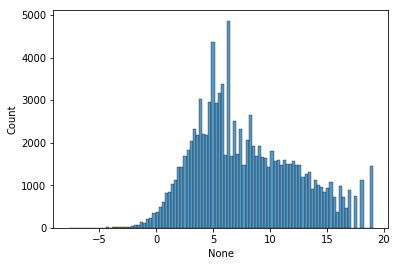

In [17]:
sns.histplot(pmis)

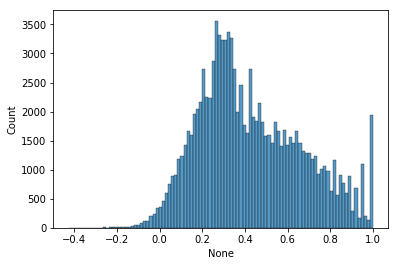

In [18]:
joint = lambda u, v: NG.cond_prob(u, v)*NG.prob(u)

norm = lambda u, v: -np.log2(joint(u, v))

# sns.histplot([pmi_val/(NG.freq(w.split()[0]) + NG.freq(v.split()[0])) for w, pmi_val in pmis.items()])

sns.histplot([pmi_val/norm(*w.split()) for w, pmi_val in pmis.items()])

# sns.histplot([pmi_val*joint(*w.split()) for w, pmi_val in pmis.items()])

In [19]:
for w, x in pmis.items():
    if x < 15:
        u, v = w.split() 
        if NG.freq(u) == NG.freq(v) == 1:
            print(u, v)

In [20]:
f = lambda w: len(w)  # sum(map(len, w.split()))/2

lens, pmi_vals = list(zip(*map(lambda t: (f(t[0]), t[1]), pmis.items())))